In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [2]:
import tensorflow as tf

# List available devices
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("Physical Devices: ", tf.config.list_physical_devices())


Num GPUs Available:  1
Physical Devices:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
import GPUtil

# Get the list of all GPUs & its status
gpus = GPUtil.getGPUs()

# Print GPU information
for gpu in gpus:
    print(f"GPU ID: {gpu.id}")
    print(f"Name: {gpu.name}")
    print(f"Memory Total: {gpu.memoryTotal}MB")
    print(f"Memory Free: {gpu.memoryFree}MB")
    print(f"Memory Used: {gpu.memoryUsed}MB")
    print(f"GPU Load: {gpu.load * 100}%")
    print(f"Temperature: {gpu.temperature}°C")
    print("----------")


GPU ID: 0
Name: NVIDIA GeForce GTX 1650
Memory Total: 4096.0MB
Memory Free: 3902.0MB
Memory Used: 36.0MB
GPU Load: 0.0%
Temperature: 51.0°C
----------


### Data Visualization

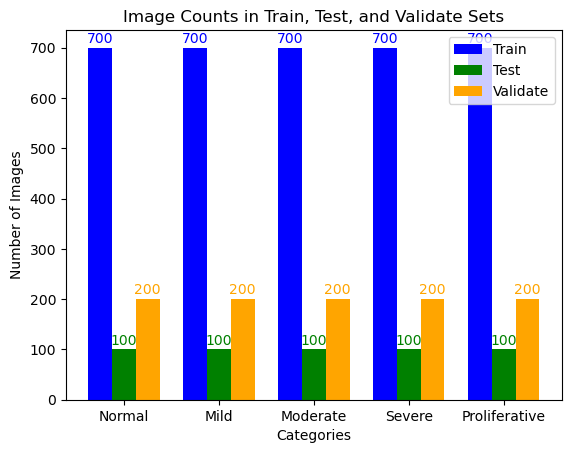

In [4]:
# Define the base directories for train, test, and validate datasets
dataset_base_dir = 'dataset'  # Replace with your dataset directory
train_dir = os.path.join(dataset_base_dir, 'train')
test_dir = os.path.join(dataset_base_dir, 'test')
validate_dir = os.path.join(dataset_base_dir, 'validate')

# Define the categories (subfolders) in each directory
categories = ['Normal', 'Mild', 'Moderate', 'Severe', 'Proliferative']

# Function to count the number of images in each category
def count_images_in_category(base_dir, categories):
    image_counts = {}
    for category in categories:
        category_folder = os.path.join(base_dir, category)
        if os.path.exists(category_folder):
            image_counts[category] = len([f for f in os.listdir(category_folder) if os.path.isfile(os.path.join(category_folder, f))])
        else:
            image_counts[category] = 0  # If the folder doesn't exist, count is 0
    return image_counts

# Count images in train, test, and validate directories
train_counts = count_images_in_category(train_dir, categories)
test_counts = count_images_in_category(test_dir, categories)
validate_counts = count_images_in_category(validate_dir, categories)

# Bar plot for image counts in each set (train, test, validate)
def plot_image_counts(train_counts, test_counts, validate_counts, categories):
    bar_width = 0.25  # Width of each bar
    index = range(len(categories))  # Index for the categories
    
    # Bar positions for each dataset
    train_bar = [i for i in index]
    test_bar = [i + bar_width for i in index]
    validate_bar = [i + 2 * bar_width for i in index]
    
    # Plotting the bars
    plt.bar(train_bar, list(train_counts.values()), width=bar_width, label='Train', color='blue')
    plt.bar(test_bar, list(test_counts.values()), width=bar_width, label='Test', color='green')
    plt.bar(validate_bar, list(validate_counts.values()), width=bar_width, label='Validate', color='orange')
    
    # Adding labels and title
    plt.xlabel('Categories')
    plt.ylabel('Number of Images')
    plt.title('Image Counts in Train, Test, and Validate Sets')
    
    # Set category names as the x-axis labels
    plt.xticks([r + bar_width for r in range(len(categories))], categories)
    
    # Adding exact numbers on top of each bar
    for i in range(len(categories)):
        plt.text(train_bar[i], train_counts[categories[i]] + 10, str(train_counts[categories[i]]), ha='center', color='blue', fontsize=10)
        plt.text(test_bar[i], test_counts[categories[i]] + 10, str(test_counts[categories[i]]), ha='center', color='green', fontsize=10)
        plt.text(validate_bar[i], validate_counts[categories[i]] + 10, str(validate_counts[categories[i]]), ha='center', color='orange', fontsize=10)
    
    # Show legend
    plt.legend()
    
    # Show the plot
    plt.show()

# Plot the image counts
plot_image_counts(train_counts, test_counts, validate_counts, categories)


In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'dataset/train',  # Full path to the 'train' directory
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False
)


Found 3500 files belonging to 5 classes.


### Validation Image Preprocessing

In [6]:
### Validation Image Preprocessing
validation_set = tf.keras.utils.image_dataset_from_directory(
    'dataset/validate',  # Full path to the 'train' directory
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False
)

Found 1000 files belonging to 5 classes.


In [7]:
training_set

<BatchDataset shapes: ((None, 256, 256, 3), (None, 5)), types: (tf.float32, tf.float32)>

In [8]:
for x,y in training_set:
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[2. 1. 0.]
   [2. 1. 0.]
   [2. 1. 0.]
   ...
   [2. 2. 0.]
   [1. 1. 0.]
   [1. 1. 0.]]

  [[2. 1. 0.]
   [2. 1. 0.]
   [2. 1. 0.]
   ...
   [0. 0. 0.]
   [1. 1. 0.]
   [1. 1. 0.]]

  [[2. 1. 0.]
   [2. 1. 0.]
   [1. 0. 0.]
   ...
   [1. 1. 0.]
   [2. 2. 0.]
   [2. 2. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]]


 [[[3. 1. 2.]
   [3. 1. 2.]
   [3. 1. 2.]
   ...
   [2. 2. 2.]
   [2. 2. 2.]
   [2. 2. 2.]]

  [[1. 1. 1.]
   [2. 2. 2.]
   [2. 2. 2.]
   ...
   [2. 2. 2.]
   [2. 2. 2.]
   [2. 2. 2.]]

  [[1. 1. 1.]
   [2. 2. 2.]
   [2. 2. 2.]
   ...
   [2. 2. 2.]
   [1. 1. 1.]
   [2. 2. 2.]]

  ...

  [[3. 1. 2.]
   [1. 1. 1.]
   [2. 2. 2.]
   ...
   [2. 2. 2.]
   [2. 2. 2.]
   [2. 2. 2.]]

  [[3. 1. 2.]
   [3. 1. 2.]
   [3. 1. 2.]
 

### To avoid Overshooting
1. Choose small learning rate default is 0.001, we are taking 0.001
2. There may be chance of Underfitting , so increase numbe of neuron
3. Add more Convulation layer to extract more feature from images there may be possibly that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature


  ## Building Model

In [9]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, Input
from tensorflow.keras.models import Sequential

In [10]:
model = Sequential()

## Building Convolution Layer

In [11]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[256,256,3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu')) # This layer now expects a 4D tensor
model.add(MaxPool2D(pool_size=2, strides=2))

In [12]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [13]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [14]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [15]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [16]:
model.add(Dropout(0.25)) #To avoid overfitting

In [17]:
model.add(Flatten())

In [18]:
model.add(Dense(units=1500, activation='relu'))

In [19]:
model.add(Dropout(0.4))

In [20]:
#Output Layer
model.add(Dense(5, activation='softmax'))

## Compiling Model


In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 254, 254, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 127, 127, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 128)       7

## Model Training

In [23]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=20)

Epoch 1/20
110/110 [==============================] - 102s 712ms/step - loss: 1.4173 - accuracy: 0.4194 - val_loss: 1.1922 - val_accuracy: 0.5120
Epoch 2/20
110/110 [==============================] - 69s 626ms/step - loss: 1.1139 - accuracy: 0.5391 - val_loss: 1.1873 - val_accuracy: 0.4970
Epoch 3/20
110/110 [==============================] - 69s 624ms/step - loss: 1.0555 - accuracy: 0.5829 - val_loss: 1.0860 - val_accuracy: 0.5640
Epoch 4/20
110/110 [==============================] - 69s 623ms/step - loss: 0.9821 - accuracy: 0.6151 - val_loss: 1.0013 - val_accuracy: 0.6010
Epoch 5/20
110/110 [==============================] - 69s 624ms/step - loss: 0.9144 - accuracy: 0.6383 - val_loss: 1.0022 - val_accuracy: 0.5890
Epoch 6/20
110/110 [==============================] - 69s 624ms/step - loss: 0.8463 - accuracy: 0.6700 - val_loss: 0.9952 - val_accuracy: 0.6090
Epoch 7/20
110/110 [==============================] - 69s 630ms/step - loss: 0.8065 - accuracy: 0.6829 - val_loss: 0.9668 - val_a

## Model Evaluation

In [24]:
# model Evaluation on training set
train_loss,train_acc = model.evaluate(training_set)

110/110 [==============================] - 17s 148ms/step - loss: 0.0914 - accuracy: 0.9757


In [25]:
print(train_loss, train_acc)

0.09141089022159576 0.9757142663002014


In [26]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

32/32 [==============================] - 5s 139ms/step - loss: 1.1654 - accuracy: 0.7490


In [27]:
print(val_loss, val_acc)

1.16541588306427 0.7490000128746033


### Save this Model

In [28]:
model.save("trained_model.keras", save_format='keras') #keras is better than h5 as it takes less space


In [29]:
training_history.history

{'loss': [1.4172651767730713,
  1.1138882637023926,
  1.0554769039154053,
  0.9820851683616638,
  0.9144012928009033,
  0.8462638258934021,
  0.8065342903137207,
  0.7152516841888428,
  0.642162024974823,
  0.5520166158676147,
  0.4939608573913574,
  0.4253246486186981,
  0.35849592089653015,
  0.32084301114082336,
  0.2892078459262848,
  0.24685199558734894,
  0.21386924386024475,
  0.18033091723918915,
  0.17056363821029663,
  0.16065868735313416],
 'accuracy': [0.4194285571575165,
  0.5391428470611572,
  0.5828571319580078,
  0.6151428818702698,
  0.6382856965065002,
  0.6700000166893005,
  0.6828571557998657,
  0.7245714068412781,
  0.75685715675354,
  0.7951428294181824,
  0.8088571429252625,
  0.8482857346534729,
  0.8691428303718567,
  0.8914285898208618,
  0.899142861366272,
  0.9131428599357605,
  0.9297142624855042,
  0.9391428828239441,
  0.9480000138282776,
  0.9462857246398926],
 'val_loss': [1.1921988725662231,
  1.187286376953125,
  1.0860055685043335,
  1.00127911567687

In [30]:
training_history.history['accuracy']

[0.4194285571575165,
 0.5391428470611572,
 0.5828571319580078,
 0.6151428818702698,
 0.6382856965065002,
 0.6700000166893005,
 0.6828571557998657,
 0.7245714068412781,
 0.75685715675354,
 0.7951428294181824,
 0.8088571429252625,
 0.8482857346534729,
 0.8691428303718567,
 0.8914285898208618,
 0.899142861366272,
 0.9131428599357605,
 0.9297142624855042,
 0.9391428828239441,
 0.9480000138282776,
 0.9462857246398926]

## Accuracy Visualization

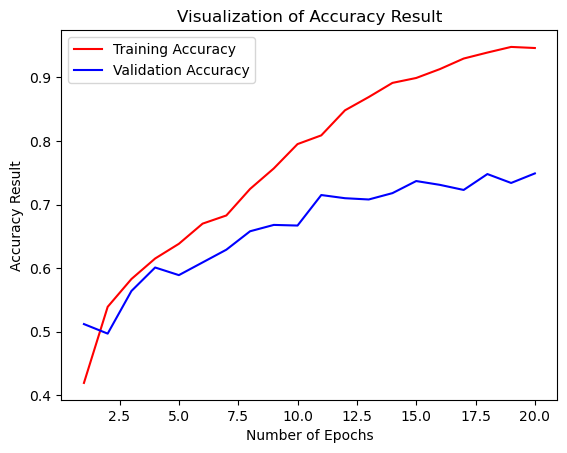

In [31]:
# Assuming your training history contains accuracy data
epochs = list(range(1, len(training_history.history['accuracy']) + 1))

# Plotting the accuracies
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()


### Some other metrics for model evaluation

In [32]:
class_name = validation_set.class_names
class_name

['Mild', 'Moderate', 'Normal', 'Proliferative', 'Severe']

In [33]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'Dataset/validate',  # Full path to the 'train' directory
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False
)

Found 1000 files belonging to 5 classes.


In [34]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

(array([[8.8615799e-01, 2.8842272e-02, 6.3552506e-02, 2.1419536e-02,
         2.7713937e-05],
        [5.8223474e-01, 3.7977099e-01, 1.5644898e-03, 2.2576284e-02,
         1.3853526e-02],
        [4.0285145e-03, 2.0002593e-01, 7.9548883e-01, 4.4542117e-04,
         1.1314820e-05],
        ...,
        [3.9043400e-05, 8.0012559e-04, 6.8742628e-07, 7.4158977e-03,
         9.9174422e-01],
        [4.0592972e-06, 5.9100436e-03, 6.7221859e-09, 2.3462411e-05,
         9.9406248e-01],
        [1.7357621e-04, 7.4368119e-02, 2.7366154e-08, 1.9520398e-03,
         9.2350626e-01]], dtype=float32),
 (1000, 5))

In [35]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [36]:
predicted_categories

<tf.Tensor: shape=(1000,), dtype=int64, numpy=
array([0, 0, 2, 0, 0, 1, 2, 1, 0, 0, 1, 4, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 3, 0, 1, 0, 1, 4, 1, 1, 0, 3, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0,
       0, 1, 4, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 4, 0, 2,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 4, 0, 1, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 3, 0, 0, 1, 0, 4, 0, 0, 1, 0, 3, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 3, 1, 0, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 4, 3, 1, 0, 0, 1, 1, 1, 4, 1, 1, 1, 0, 4, 4, 1, 0, 1, 1,
       1, 4, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       3, 2, 1, 1, 1, 1, 3, 0, 1, 1, 3, 1, 1, 1, 1, 0, 4, 1, 1, 1, 1, 1,
    

In [37]:
true_categories = tf.concat([y for x,y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(1000, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)>

In [38]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(1000,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    

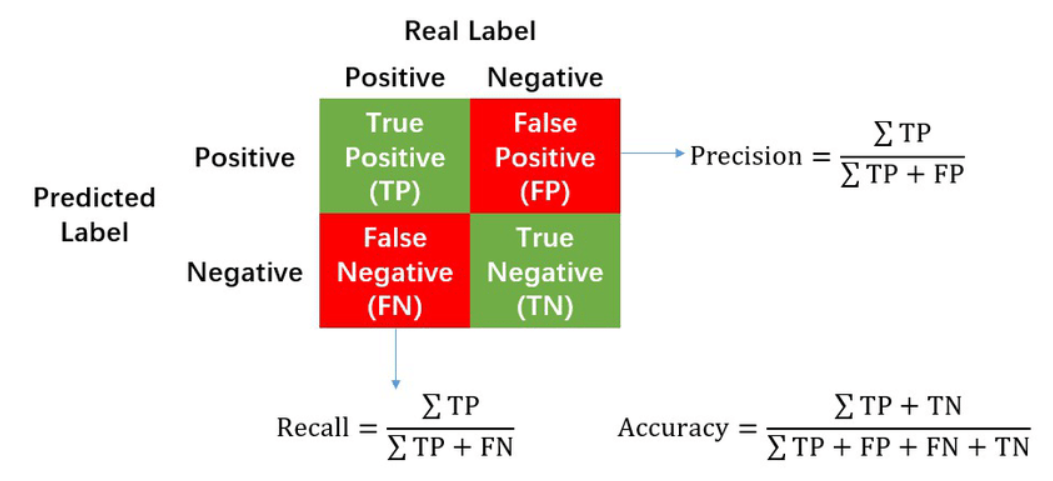

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [40]:
print(classification_report(Y_true, predicted_categories, target_names=class_name))

               precision    recall  f1-score   support

         Mild       0.73      0.73      0.73       200
     Moderate       0.61      0.68      0.64       200
       Normal       0.95      0.90      0.92       200
Proliferative       0.71      0.65      0.68       200
       Severe       0.77      0.80      0.78       200

     accuracy                           0.75      1000
    macro avg       0.75      0.75      0.75      1000
 weighted avg       0.75      0.75      0.75      1000



In [41]:
cn = confusion_matrix(Y_true, predicted_categories)
cn


array([[146,  28,   4,  13,   9],
       [ 24, 135,   3,  25,  13],
       [  6,  12, 179,   2,   1],
       [ 16,  27,   3, 129,  25],
       [  8,  19,   0,  13, 160]], dtype=int64)

### Confusion Matrix Visualization

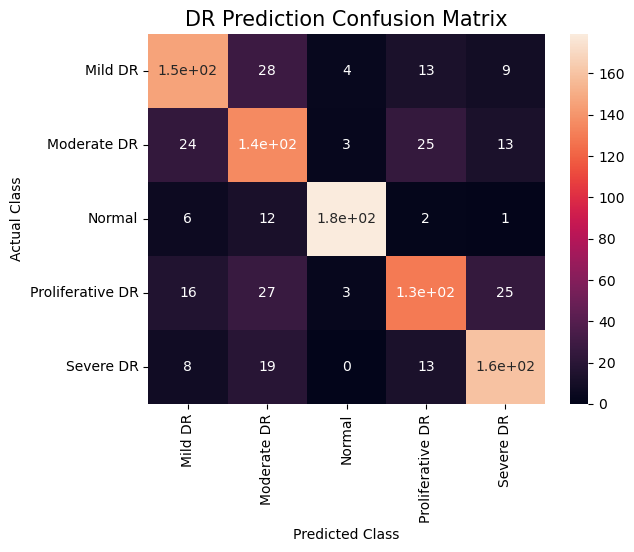

In [42]:
# plt.figure(figsize=(40,40))
class_names = ['Mild DR', 'Moderate DR','Normal', 'Proliferative DR', 'Severe DR' ]
sns.heatmap(cn, annot=True, annot_kws={'size':10}, xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("DR Prediction Confusion Matrix", fontsize=15)
plt.show()